In [1]:
import pandas as pd 
import numpy as np
from bidi.algorithm import get_display
from arabic_reshaper import reshape
from matplotlib import pyplot# رسم شکل
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from keras.callbacks import EarlyStopping
np.set_printoptions(threshold=10000000000000000000)
pd.set_option('display.width',100000)
pd.set_option('display.max_rows',100000)
pd.set_option('display.max_columns',100000)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Z=pd.read_excel("D1.xlsx")
# Z=pd.read_excel("D2.xlsx")
# Z=pd.read_excel("otherdatasets\DOGE-USD.xlsx")
# Z=pd.read_excel("otherdatasets\ETH-USD.xlsx")
# Z=pd.read_excel("otherdatasets\USDT-USD.xlsx")
Z=pd.read_excel("otherdatasets\XRP-USD.xlsx")

In [3]:
Z

,Date,Open,High,Low,Price,Adj Close,Volume
0,2018-08-12,0.300604,0.309376,0.297057,0.297870,0.297870,178827000
1,2018-08-13,0.297572,0.310680,0.276544,0.277466,0.277466,235117000
2,2018-08-14,0.278738,0.279615,0.253983,0.274272,0.274272,276768000
3,2018-08-15,0.276797,0.301744,0.276797,0.282005,0.282005,332432000
4,2018-08-16,0.282034,0.300958,0.278203,0.292436,0.292436,238219000
5,2018-08-17,0.292808,0.373619,0.292766,0.366676,0.366676,497206000
6,2018-08-18,0.363027,0.369954,0.317115,0.327100,0.327100,434332000
7,2018-08-19,0.327363,0.353079,0.321945,0.343978,0.343978,327300000
8,2018-08-20,0.344451,0.351689,0.317692,0.319283,0.319283,311144000
9,2018-08-21,0.318219,0.338100,0.316983,0.335177,0.335177,248735000


In [4]:
Z.isnull().sum()

Date         0
Open         0
High         0
Low          0
Price        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
data=Z[['Open','High','Low','Price']]

In [6]:
scaler = StandardScaler()

In [7]:
#data_standard=scaler.fit_transform(data)
#data_standard

In [8]:
#data_standard_array=np.array(data_standard)

In [9]:
#data_standard_array.shape

In [10]:
#X=data[:,:3]

In [11]:
#X.shape

In [12]:
Y=data[['Price']]

In [13]:
Y.shape

(1462, 1)

In [14]:
Y['difference']=np.log(Y).diff()

In [15]:
Y.isna().sum()

Price         0
difference    1
dtype: int64

In [16]:
Y.dropna(inplace=True)

In [17]:
Y=Y['difference']

In [18]:
Y

1      -0.070959
2      -0.011578
3       0.027804
4       0.036321
5       0.226233
6      -0.114213
7       0.050312
8      -0.074500
9       0.048581
10     -0.046954
11      0.024421
12     -0.000314
13      0.001903
14     -0.013663
15      0.039743
16      0.043373
17     -0.020195
18     -0.027518
19     -0.000334
20      0.036279
21     -0.015062
22     -0.019344
23     -0.012909
24     -0.156518
25      0.065207
26     -0.037958
27     -0.042412
28     -0.002340
29     -0.030454
30     -0.024760
31      0.023894
32      0.038125
33     -0.012278
34      0.017344
35     -0.002990
36     -0.032221
37      0.167392
38      0.012943
39      0.322005
40      0.221479
41      0.016491
42     -0.000191
43     -0.142869
44      0.063113
45     -0.020385
46      0.047420
47     -0.004200
48      0.057865
49      0.017946
50     -0.008827
51     -0.101471
52      0.013966
53     -0.002950
54     -0.014499
55     -0.061471
56     -0.012458
57      0.015872
58     -0.020409
59     -0.0370

In [19]:
#Y=Y.reshape(1,-1)

In [20]:
#Y.shape

In [21]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)
n_steps = 3
X, y = split_sequence(Y, n_steps)
for i in range(len(X)):
    print(X[i], y[i])

[-0.07095875 -0.01157809  0.02780449] 0.027804486560911945
[-0.01157809  0.02780449  0.03632104] 0.036321038034763165
[0.02780449 0.03632104 0.22623279] 0.22623278502769795
[ 0.03632104  0.22623279 -0.11421269] -0.11421268979550714
[ 0.22623279 -0.11421269  0.05031177] 0.050311767295576626
[-0.11421269  0.05031177 -0.07449985] -0.07449984500226181
[ 0.05031177 -0.07449985  0.04858089] 0.048580893664316616
[-0.07449985  0.04858089 -0.04695357] -0.04695356928307626
[ 0.04858089 -0.04695357  0.02442084] 0.024420838252777077
[-0.04695357  0.02442084 -0.00031435] -0.00031435264215895486
[ 0.02442084 -0.00031435  0.00190292] 0.0019029153272969168
[-0.00031435  0.00190292 -0.01366266] -0.013662663487337356
[ 0.00190292 -0.01366266  0.03974314] 0.039743136422890846
[-0.01366266  0.03974314  0.04337295] 0.04337294507473621
[ 0.03974314  0.04337295 -0.02019476] -0.02019476071935511
[ 0.04337295 -0.02019476 -0.02751821] -0.027518212020035016
[-0.02019476 -0.02751821 -0.00033394] -0.00033394158717

[-0.00490935 -0.03237915  0.00474414] 0.004744144306097375
[-0.03237915  0.00474414  0.00150147] 0.0015014722307027384
[ 0.00474414  0.00150147 -0.0118081 ] -0.011808100933501597
[ 0.00150147 -0.0118081   0.00626904] 0.006269044411625568
[-0.0118081   0.00626904  0.00151318] 0.0015131841857447537
[ 0.00626904  0.00151318 -0.00513605] -0.0051360483964570935
[ 0.00151318 -0.00513605  0.00930239] 0.009302392662313697
[-0.00513605  0.00930239 -0.00544789] -0.005447885451975054
[ 0.00930239 -0.00544789  0.06320761] 0.06320760824132043
[-0.00544789  0.06320761 -0.02024957] -0.020249570988025933
[ 0.06320761 -0.02024957  0.1023026 ] 0.10230259990791568
[-0.02024957  0.1023026  -0.00874388] -0.008743879341201799
[ 0.1023026  -0.00874388 -0.02120798] -0.021207980810885374
[-0.00874388 -0.02120798  0.01272998] 0.012729977408993953
[-0.02120798  0.01272998 -0.00328077] -0.0032807726042973773
[ 0.01272998 -0.00328077 -0.00983689] -0.009836892454148538
[-0.00328077 -0.00983689  0.0011777 ] 0.001177

[0.00779753 0.01911653 0.01157266] 0.01157265852146172
[ 0.01911653  0.01157266 -0.01745328] -0.01745327905755667
[ 0.01157266 -0.01745328 -0.00080902] -0.0008090170884168524
[-0.01745328 -0.00080902 -0.04754495] -0.04754494902421358
[-0.00080902 -0.04754495 -0.06133725] -0.06133724626412551
[-0.04754495 -0.06133725 -0.03842832] -0.038428324717888485
[-0.06133725 -0.03842832 -0.10580765] -0.10580764574957091
[-0.03842832 -0.10580765  0.03583949] 0.03583949286112409
[-0.10580765  0.03583949  0.06478237] 0.0647823660196809
[ 0.03583949  0.06478237 -0.09659525] -0.09659525347695497
[ 0.06478237 -0.09659525  0.02944468] 0.029444676306998874
[-0.09659525  0.02944468 -0.04223539] -0.042235387108671585
[ 0.02944468 -0.04223539  0.056668  ] 0.05666799675826639
[-0.04223539  0.056668   -0.00833699] -0.00833698751994616
[ 0.056668   -0.00833699  0.01619737] 0.016197368707817184
[-0.00833699  0.01619737 -0.01855366] -0.01855365862762537
[ 0.01619737 -0.01855366  0.03934768] 0.03934768414713696
[-

In [22]:
n_features=1

In [23]:
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [24]:
X.shape

(1458, 3, 1)

In [25]:
y.shape

(1458,)

In [26]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=False)

In [35]:
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='sigmoid'), input_shape=(n_steps, n_features)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [36]:
model.fit(X_train,y_train,epochs=120,shuffle=False,validation_split=0.2,batch_size=5 ,verbose=0)

In [37]:
yhat = model.predict(X_test)

In [38]:
np.sqrt(mean_squared_error(y_test,yhat))

0.006975141769225075

In [39]:
mean_squared_error(y_test,yhat)

4.8652602700788306e-05

In [40]:
mean_absolute_error(y_test,yhat)

0.005658839263653583

In [33]:
Y_P=model.predict(X)
Y_P=np.array(Y_P)

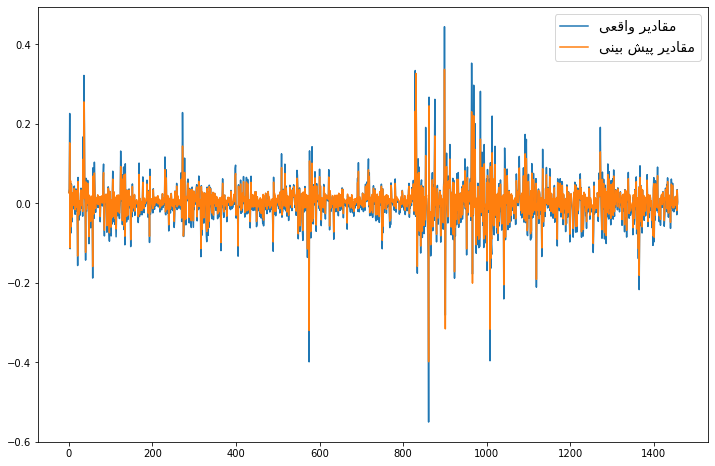

In [34]:
plt.figure(figsize=(12, 8))
plt.plot(y,label=get_display(reshape('مقادیر واقعی')))
plt.plot(Y_P.reshape(-1,1),label=get_display(reshape('مقادیر پیش بینی')))
plt.legend(loc='best',fontsize=14)
plt.show()